Text(0, 0.5, 'Mean squrared error')

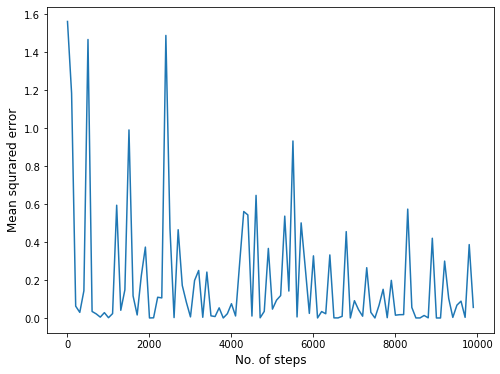

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
import random

dat=load_iris()


col=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
d = pd.DataFrame(dat.data, columns=col)
d['target']=dat.target

df = d[['sepal_length', 'sepal_width','target']]


sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('target',axis='columns'))
scaled_y = sy.fit_transform(df['target'].values.reshape(df.shape[0],1))


def stochastic_gradient_descent(X, y, n, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features.
    
    w = np.ones(shape=(number_of_features)) 
    
    b = 0 # For biased value initiation
    
    total_samples = X.shape[0]
    
    
    mse_list = [] # Mean squared error list
    iter_list = [] # No. of steps for iterations
    
    
    for i in range(n):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        mse = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the Mean squared error and iteration value
            mse_list.append(mse)
            iter_list.append(i)
        
    return w, b, mse, mse_list, iter_list

w_sgd, b_sgd, cost_sgd, mse_list_sgd, iter_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

plt.plot(iter_list_sgd,mse_list_sgd)
plt.rcParams['figure.figsize']=(8,6)
plt.xlabel('No. of steps',fontsize=12)
plt.ylabel('Mean squrared error', fontsize=12)